Análisis de los futbolistas prospectos entre 2021 y 2024 basado en el dataset de los jugadores de FIFA

Por medio de la plataforma sofifa.com, con un método llamado Web Scraping se logró recolectar un histórico detallado de los datos de jugadores de futbol a través del modo de juego "Modo Carrera" de la saga de videojuegos FIFA, desde la edición "FIFA 15" (correspondiente a datos de jugadores de la temporada 2014-15) hasta la edición "EA SPORTS FC 24" (correspondiente a datos de jugadores de la temporada 2023-24)

Sofifa es una plataforma que actúa como la base de datos de los jugadores, con cada estadística completa acerca del jugador y su desempeño en el videojuego.

A través del Web Scraping se almacenan:

- Todos los jugadores, entrenadores y equipos disponibles en FIFA 15, 16, 17, 18, 19, 20, 21, 22, 23 y también en EA Sports FC 24.
- Todas las actualizaciones de FIFA desde el 10 de septiembre de 2015 hasta el 22 de septiembre de 2023
- 109 atributos para jugadores, 8 atributos para entrenadores y 54 atributos para equipos
- URL de los jugadores, entrenadores y equipos eliminados
- Posiciones de jugadores, con el rol en el club y en la selección
- Atributos del jugador con estadísticas como ataque, habilidades, defensa, mentalidad, habilidades GK, etc.
- Datos personales del jugador como nacionalidad, club, fecha de nacimiento, salario, etc.
- Datos del equipo sobre sus entrenadores, su valor general y tácticas.

en los siguientes CSV, tipo de datos de dato semi-estructurado:

- female_coaches.csv
- female_players.csv
- female_teams.csv
- male_coaches.csv
- male_players.csv
- male_teams.csv

Dado que haremos un análisis orientado a los jugadores masculinos prospectos de las 4 entregas 
"FIFA 21"
"FIFA 22"
"FIFA 23"
"EA FC 24"

utilizaremos
- male_players.csv

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [4]:
#Url donde está publicado el dataset y de donde se consumirá
url = 'https://raw.githubusercontent.com/CamiloAleman/FC24_Prospects_Analysis/refs/heads/main/data/male_players.csv'

In [5]:
#Creación de dataframe
main_df = pd.read_csv(url, low_memory=False)

In [6]:
#Si queremos condicionar para ver los prospectos (jugadores de presente y futuro con un gran nivel pero sin ser estrellas mundiales)
#Condicionamos "es prospecto" para la edición de FIFA 21, 22 23 y 24

is_prospect = (
    (main_df['potential'] >= 80) & 
    (main_df['age'] <= 26) & 
    (main_df['value_eur'] <= 10000000) & 
    (main_df['fifa_version'].isin([21.0, 22.0, 23.0, 24.0]))
)

Para contextualizar, dentro del videojuego existe la variable "Overall", un cuantitativo que de manera muy expresa, indica el rendimiento en general de un jugador (en una escala del 1 de overall hasta 99 de overall).

Existe también otro cuantitativo llamado "potential", que de manera evidente, predice de por sí qué potencial o qué posible overall futuro tendrá un jugador. Usaremos como referencia a aquellos jugadores jóvenes (máximo 24 años) que tengan un valor potential de 83 o más, y que en el mercado de transferencia esté valorado por lo menos en 2 millones de euros.

In [7]:
#Creación de nuevo dataframe con sólo los prospectos que ya definimos

prospects_df = main_df[is_prospect]

In [85]:
prospects_df.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
1124,231227,/player/231227/niklas-dorsch/240002,24.0,2.0,2023-09-22,N. Dorsch,Niklas Bernd Dorsch,"CDM, CM",76,81,...,75+2,75+2,75+2,73+2,72+2,72+2,72+2,72+2,72+2,16+2
1125,233885,/player/233885/eray-comert/240002,24.0,2.0,2023-09-22,E. Cömert,Eray Ervin Cömert,CB,76,81,...,74+2,74+2,74+2,70+2,72+2,76+2,76+2,76+2,72+2,14+2
1128,240453,/player/240453/sikou-niakate/240002,24.0,2.0,2023-09-22,S. Niakaté,Sikou Niakaté,"CB, LB",76,81,...,70+2,70+2,70+2,70+2,72+2,76+2,76+2,76+2,72+2,17+2
1131,241585,/player/241585/igor-julio-dos-santos-de-paulo/...,24.0,2.0,2023-09-22,Igor,Igor Júlio dos Santos de Paulo,CB,76,81,...,71+2,71+2,71+2,66+2,69+2,76+2,76+2,76+2,69+2,17+2
1132,242663,/player/242663/sebastiaan-bornauw/240002,24.0,2.0,2023-09-22,S. Bornauw,Sebastiaan Bornauw,CB,76,81,...,70+2,70+2,70+2,69+2,71+2,76+2,76+2,76+2,71+2,16+2


In [86]:
#Estadísticas básicas del dataset
prospects_df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,3346.000000,3346.000000,3346.0,3346.000000,3346.000000,3.346000e+03,3346.000000,3346.000000,3346.000000,3346.000000,...,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,190.000000
mean,251450.887328,22.514644,2.0,69.071429,81.533772,4.141303e+06,11864.704124,20.402570,180.872086,73.395099,...,62.331142,48.113867,50.488942,48.023909,13.446204,13.268679,13.382247,13.297071,13.560968,36.705263
std,12926.035494,1.125301,0.0,4.415692,1.658667,2.591668e+06,12313.723451,2.084374,6.920027,6.839822,...,9.558116,20.245604,21.264117,20.730718,14.156596,13.609737,13.510668,13.744440,14.555230,10.304747
min,193794.000000,21.000000,2.0,54.000000,80.000000,4.000000e+05,500.000000,16.000000,161.000000,53.000000,...,21.000000,5.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,242453.000000,22.000000,2.0,66.000000,80.000000,2.000000e+06,3000.000000,19.000000,175.000000,69.000000,...,58.000000,30.000000,31.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,29.000000
50%,252592.000000,22.000000,2.0,70.000000,81.000000,3.500000e+06,8000.000000,20.000000,181.000000,73.000000,...,64.000000,53.000000,58.000000,55.000000,10.000000,10.000000,10.000000,10.000000,10.000000,36.000000
75%,260652.500000,24.000000,2.0,73.000000,82.000000,6.000000e+06,17000.000000,22.000000,186.000000,78.000000,...,69.000000,66.000000,70.000000,67.000000,13.000000,13.000000,13.000000,13.000000,13.000000,45.000000
max,278077.000000,24.000000,2.0,76.000000,89.000000,1.000000e+07,84000.000000,26.000000,206.000000,100.000000,...,83.000000,83.000000,82.000000,80.000000,80.000000,78.000000,82.000000,80.000000,85.000000,60.000000


Tablas de frecuencia para valores relevantes

En este caso la cantidad de prospectos por edición

In [11]:
#Creación de una nueva tabla, en la que creamos nuevos índices para los registros
edition_freq_table = prospects_df['fifa_version'].value_counts().reset_index()

#Columnas de la nueva tabla y columna nueva "Percentage"
edition_freq_table.columns = ['fifa_version', 'count']
edition_freq_table['percentage'] = (edition_freq_table['count'] / len(prospects_df)) * 100

edition_freq_table.head()

,fifa_version,count,percentage
0,24.0,885,26.449492
1,22.0,879,26.270173
2,21.0,815,24.357442
3,23.0,767,22.922893


Resúmenes Gráficos respectivo a la distribución de prospectos por edición:

Gráfico de Barras

Text(0, 0.5, 'Frecuencia')

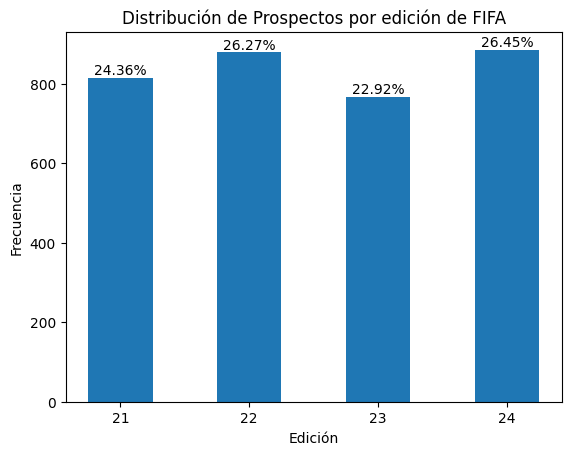

In [24]:
#Creación de gráfico de barras mostrando dicha distribución
plt.bar(edition_freq_table['fifa_version'], edition_freq_table['count'], width = 0.5)

#Valores de la tabla de frecuencia para el eje x
plt.xticks(edition_freq_table['fifa_version'])

#Mostrando porcentajes por cada fila
for record, row in edition_freq_table.iterrows():
    plt.text(row['fifa_version'], row['count'], f"{row['percentage']:.2f}%", ha='center', va='bottom')

plt.title('Distribución de Prospectos por edición de FIFA')
plt.xlabel('Edición')
plt.ylabel('Frecuencia')

Además de saber en qué edición aparecieron un mayor número de prospectos, sería muy interesante saber de dónde vienen estos jugadores, en qué liga es en la que están repuntando y de qué nivel es.

Hay jugadores que actualmente están en ligas de
1er nivel o
2do nivel o
3er nivel o
4to nivel

In [52]:
#Creación de una nueva tabla, en la que creamos nuevos índices para los registros
leagueslvl_freq_table = prospects_df['league_level'].value_counts().reset_index()

#Columnas de la nueva tabla y columna nueva "Percentage"
leagueslvl_freq_table.columns = ['league_level', 'count']
leagueslvl_freq_table['percentage'] = (leagueslvl_freq_table['count'] / len(prospects_df)) * 100

leagueslvl_freq_table.head()

,league_level,count,percentage
0,1.0,2848,85.116557
1,2.0,451,13.478781
2,3.0,45,1.344889
3,4.0,2,0.059773


Por otra parte es interesante conocer, que mundialmente se es sabido que las mejores ligas del mundo, mejor conocidas como "las 5 grandes ligas" están en europa y que son la cuna de muchos futbolistas exitosos actualmente.

Las 5 grandes ligas son:
- Premier League
- LaLiga
- Bundesliga
- Ligue 1
- Serie A

Nuestra tabla de frecuencia de cuáles son las ligas con una mayor repetición en registros coincide exactamente con esta descripción anteriormente hecha.

In [55]:
#Creación de una nueva tabla, en la que creamos nuevos índices para los registros
leagues_freq_table = prospects_df['league_name'].value_counts().reset_index()

#Columnas de la nueva tabla y columna nueva "Percentage"
leagues_freq_table.columns = ['league_name', 'count']
leagues_freq_table['percentage'] = (leagues_freq_table['count'] / len(prospects_df)) * 100

leagues_freq_table.head()

,league_name,count,percentage
0,Premier League,402,12.014345
1,Bundesliga,311,9.294680
2,La Liga,309,9.234907
3,Ligue 1,255,7.621040
4,Serie A,250,7.471608


Text(0, 0.5, 'Frecuencia')

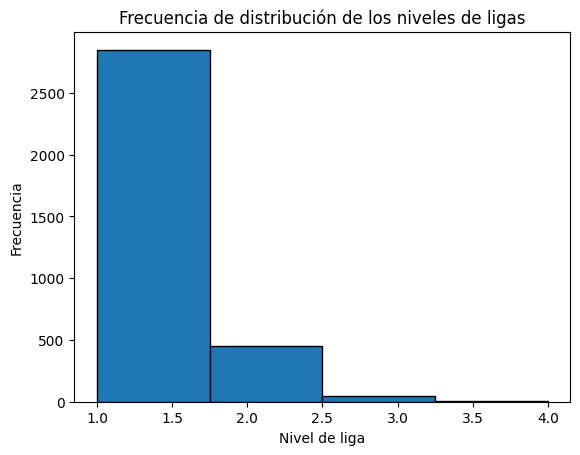

In [71]:
#Nuevo histograma a partir de la distribución encontrada de "league_level"
plt.hist(prospects_df['league_level'], bins=4, edgecolor='black')

plt.title('Frecuencia de distribución de los niveles de ligas')
plt.xlabel('Nivel de liga')
plt.ylabel('Frecuencia')

Correlación entre variables

El primer patrón identificado, es que a medida de que los jugadores prospectos crecen por la variable "potential", su valor en el mercado de transferencias crece, teniendo la frecuenia de valores para la tasa del mercado más apegada a aquellos jugadores con un valor de potencial decreciente.

El crecimiento del futbolista es directamente proporcional a su valor en el mercado de transferencias.

<Axes: xlabel='value_eur', ylabel='potential'>

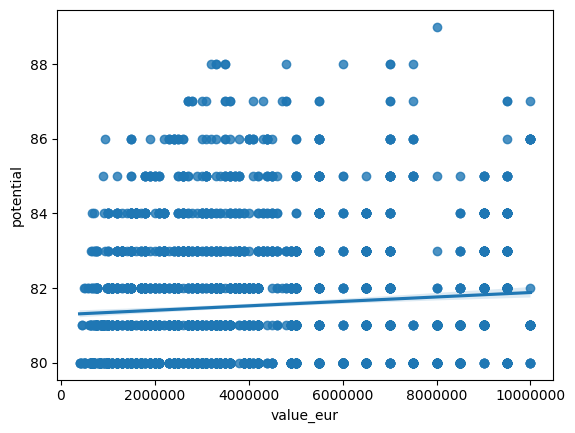

In [92]:
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')

sns.regplot(x = 'value_eur', y = 'potential', data = prospects_df)

Existen correlaciones entre variables?

A parte de los factores ya estudiados y expuestos gráficamente (la liga, el nivel de liga, la relación entre el valor del jugador y el potencial que tiene), considero pertinente evaluar atributos físicos, qué tanta relación existe entre el potencial y rasgos como el físico, aceleración o velocidad. Por otra parte veremos si existen patrones de comportamiento entre los valores de mercado y potencial

<Axes: xlabel='physic', ylabel='potential'>

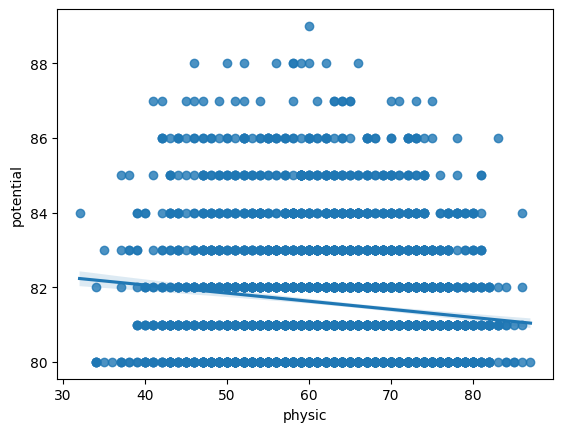

In [94]:
sns.regplot(x = 'physic', y = 'potential', data = prospects_df)

Según las mediciones, no hay tal correlación entre el valor de mercado y el potencial que marca el juego acerca del jugador

De acuerdo a las funcionalidades de correlación entre variables, encontramos que no existe tal correlación entre los atributos físicos directamente enlazados con el potencial que marca el registro del jugador, por lo que podemos decir que no existe manera de definir una relación de comportamiento en el que crezca una variable o decrezca de manera síncrona.

Text(0.5, 1.0, 'Mapa de calor de potencial relativo a la velocidad de sprint')

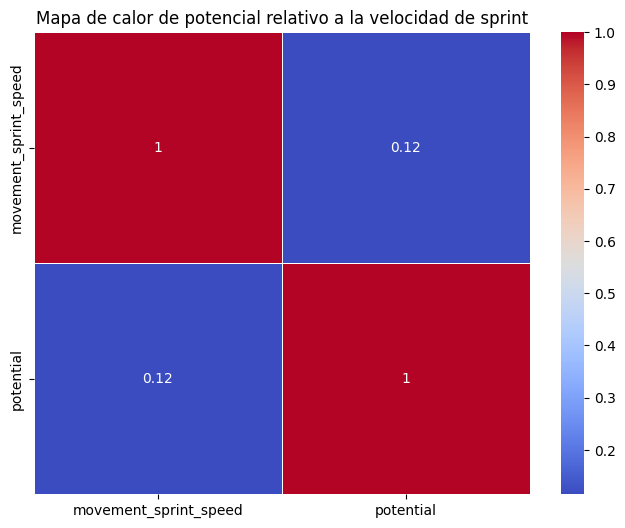

In [107]:
plt.figure(figsize=(8, 6))

sns.heatmap(prospects_df[['movement_sprint_speed', 'potential']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de potencial relativo a la velocidad de sprint')

Text(0.5, 1.0, 'Mapa de calor de potencial relativo a la aceleración de jugador')

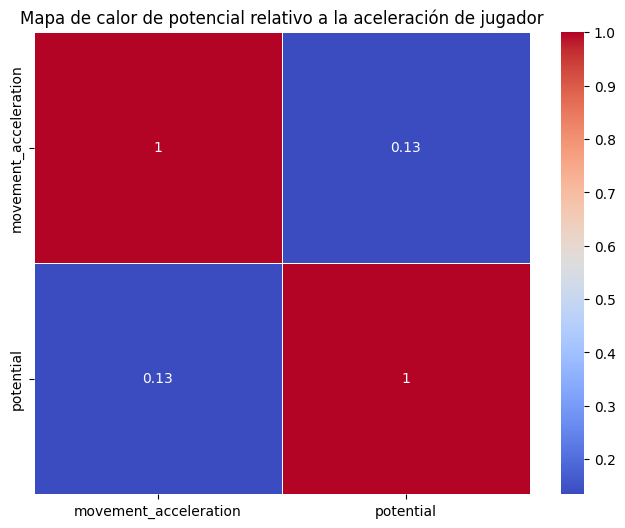

In [111]:
plt.figure(figsize=(8, 6))

sns.heatmap(prospects_df[['movement_acceleration', 'potential']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de potencial relativo a la aceleración de jugador')